In [4]:
#카이제곱 검정
import pandas as pd
import numpy as np
from scipy import stats

In [5]:
data1=[4,6,17,16,8,9]
data2=[10,10,10,10,10,10]

In [6]:
#평균이 같음
print(np.mean(data1))
print(np.mean(data2))

10.0
10.0


In [9]:
from statistics import variance,stdev
a1=variance(data1) #분산
a2=variance(data2) #분산
b1=stdev(data1) #표준편차
b2=stdev(data2) #표준편차
print(a1,a2)
print(b1,b2)

28.4 0
5.329165037789691 0.0


In [8]:
#두 데이터가 통계적으로 같은지 다른지 알고 싶으면 카이제곱 검정
chis=stats.chisquare(data1,data2)
chis
# pvalue가 0.05보다 큰지, 작은지 확인(95% 신뢰수준 하에서)
# 0.05보다 크면 대립가설(내주장) 기각, 0.05보다 작으면 대립가설 채택

Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)

In [ ]:
#흡연습관과 운동횟수의 상관관계 분석(카이제곱 검정)

#귀무가설 : 흡연습관과 운동습관은 상관관계가 없다.
#대립가설 : 흡연습관과 운동습관은 상관관계가 있다.

In [18]:
import pandas as pd

survey=pd.read_csv("d:/learn/python_statistic/data/survey.csv")
data=pd.crosstab(survey.Smoke, survey.Exer)
print(data)

Exer   Freq  None  Some
Smoke                  
Heavy     7     1     3
Never    87    18    84
Occas    12     3     4
Regul     9     1     7


In [10]:
from scipy import stats

result=stats.chi2_contingency(observed=data)
print(result)
print(result[0]) #검정통계량
print(result[1]) #p-value

(5.488545890584232, 0.48284216946545633, 6, array([[ 5.36016949,  1.0720339 ,  4.56779661],
       [92.09745763, 18.41949153, 78.48305085],
       [ 9.25847458,  1.85169492,  7.88983051],
       [ 8.28389831,  1.65677966,  7.05932203]]))
5.488545890584232
0.48284216946545633


In [18]:
#단일표본 t검정(1개의 그룹)
#연속형 변수를 대상으로 함
import numpy as np
from scipy import stats

np.random.seed(1) #랜덤시드 고정
#평균0, 표준편차 5인 20개의 난수 발생
height=[180+np.random.normal(0,5) for a in range(20)]
print(height)
result=stats.ttest_1samp(height, 175)
print(result)

[188.1217268183162, 176.94121793174963, 177.35914123868272, 174.63515688921916, 184.32703814662338, 168.49230651559859, 188.7240588210824, 176.19396549552448, 181.5951954802855, 178.75314812261294, 187.31053968522488, 169.69929645251173, 178.38791397993245, 178.07972822665792, 185.6688472116772, 174.50054366342985, 179.13785896224783, 175.61070791039313, 180.21106873357797, 182.9140760685791]
Ttest_1sampResult(statistic=3.434767428066461, pvalue=0.00277711459981648)


In [31]:
#독립표본t검정(서로 다른 2개의 그룹)
import numpy as np
from scipy import stats

group1=[170+np.random.normal(0,5) for a in range(20)]
group2=[175+np.random.normal(0,10) for a in range(20)]
print(group1)
print(group2)
#등분산 가정을 한 경우(분산이 같은 경우)
result1=stats.ttest_ind(group1, group2)
print(result1)
#등분산 가정을 하지 않은 경우(분산이 다른 경우)
result2=stats.ttest_ind(group1, group2, equal_var=False)
print(result2)

[161.40302762690237, 170.28560498041045, 166.0022625465412, 168.54202702249583, 168.70508573299733, 170.9464659877933, 167.1810563270885, 170.44843203661296, 166.99421599675307, 172.78036755038693, 178.4690455664404, 170.98434889625145, 170.84934627673786, 164.17996014419398, 173.46683112830192, 166.20966335721883, 165.95576401763935, 172.78719726429017, 170.90519372178935, 175.53587725474532]
[189.4287692849631, 169.60318437797508, 176.28376990155945, 192.6041518357532, 184.66539250229056, 182.1304905030327, 188.0620606513545, 168.95397030835625, 181.36583409414632, 189.09253389364008, 191.20912285621748, 166.93815182617777, 172.48325792368576, 178.82715173724364, 172.11002656990183, 171.08183760191952, 181.84001328181952, 171.46590017132985, 157.12087108800284, 178.6184731583957]
Ttest_indResult(statistic=-3.7268454720496673, pvalue=0.0006292569093752377)
Ttest_indResult(statistic=-3.7268454720496673, pvalue=0.0009659051174284119)


In [44]:
#대응표본 t검정(같은 그룹)
import numpy as np
from scipy import stats

#np.random.seed(1) #랜덤시드 고정
before=[60+np.random.normal(0,5) for a in range(20)]
print(before)
after=[60+w*np.random.normal(0.99,0.02) for w in range(20)]
print(after)

result=stats.ttest_rel(before, after)
print(result) 
#pvalue가 0.05보다 작으면 대립가설 채택, 귀무가설 기각
#pvalue가 0.05보다 크면 대립가설 기각, 귀무가설 채택

[56.090441586565994, 57.812455085857096, 60.47712543595629, 64.60725034329755, 60.303750978997535, 61.05562377503858, 60.08263783652808, 60.8859386013798, 54.41764991057628, 60.40463550486639, 59.06710503244267, 59.71587759557077, 62.461682779683244, 56.59660929495557, 59.57745986297685, 58.51319058613248, 62.086510024874315, 63.923853255077944, 55.22287368813156, 62.92955215551308]
[60.0, 60.96057686148335, 61.946793124187394, 62.91716534400935, 63.937672182276536, 65.1122849085954, 65.94160232116167, 66.8327428966598, 68.0194885606889, 68.80203518440725, 70.12468243240438, 70.95715874885369, 72.21330705512887, 72.69805049678021, 74.70863999146417, 75.09737538751004, 76.04946564882775, 76.81259592781339, 77.5587850371116, 78.48024790250304]
Ttest_relResult(statistic=-6.947772018095909, pvalue=1.273095470472565e-06)


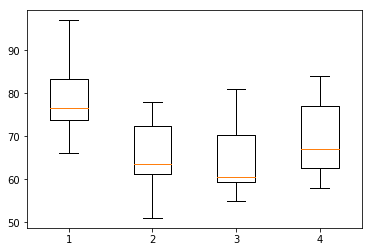

F_onewayResult(statistic=4.2210931159803815, pvalue=0.013933707427484199)


In [46]:
#아노바 분석(3개 이상의 그룹)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
a=[66,74,82,75,73,97,87,78]
b=[72,51,59,62,74,64,78,63]
c=[61,60,57,60,81,55,70,71]
d=[63,61,76,84,58,65,69,80]
plot_data=[a,b,c,d]
ax=plt.boxplot(plot_data) #박스플롯(상자수염그림)
plt.show()
result=stats.f_oneway(a,b,c,d) #아노바 분석 처리
print(result)
# pvalue가 0.05보다 작으므로 대립가설 채택, 귀무가설 기각

In [17]:
import pandas as pd
from scipy import stats

data=pd.read_csv("d:/learn/python_statistic/data/fertilizers.csv") #csv 로딩
print(data)
#아노바분석 함수
result=stats.f_oneway(data["fertilizer1"],
                      data["fertilizer2"],
                      data["fertilizer3"])
print(result[0])
print(result[1]) #pvalue
# pvalue가 0.05보다 작으므로 대립가설 채택, 귀무가설 기각
# 결론 : 3가지 비료의 수확량은 차이가 있다.

   fertilizer1  fertilizer2  fertilizer3
0           72           54           48
1           62           56           62
2           90           58           92
3           42           36           96
4           84           72           92
5           64           34           80
3.7551268418654105
0.04762461989261837
